# Lijing Yang Project


# Part1:
## Pre-processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2048)

In [2]:
df = pd.read_csv('Data/bank-additional-full.csv',delimiter=';')
df=df.drop_duplicates(keep='first')

### Step1: Replace missing value with the most frequent value

In [3]:
df = df[df != 'unknown']

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['job']])
df['job'] = imputer.transform(df[['job']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['marital']])
df['marital'] = imputer.transform(df[['marital']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['education']])
df['education'] = imputer.transform(df[['education']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['default']])
df['default'] = imputer.transform(df[['default']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['housing']])
df['housing'] = imputer.transform(df[['housing']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['loan']])
df['loan'] = imputer.transform(df[['loan']])

df=df.drop(columns=['duration'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
pd.set_option('display.max_columns', 500)
df.describe(include='all')# Calss is not balance

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,11,3,7,2,2,2,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10749,25001,13894,41173,22561,34928,26135,13767,8618,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Step2: Use numeric categories to replace the original string categories

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


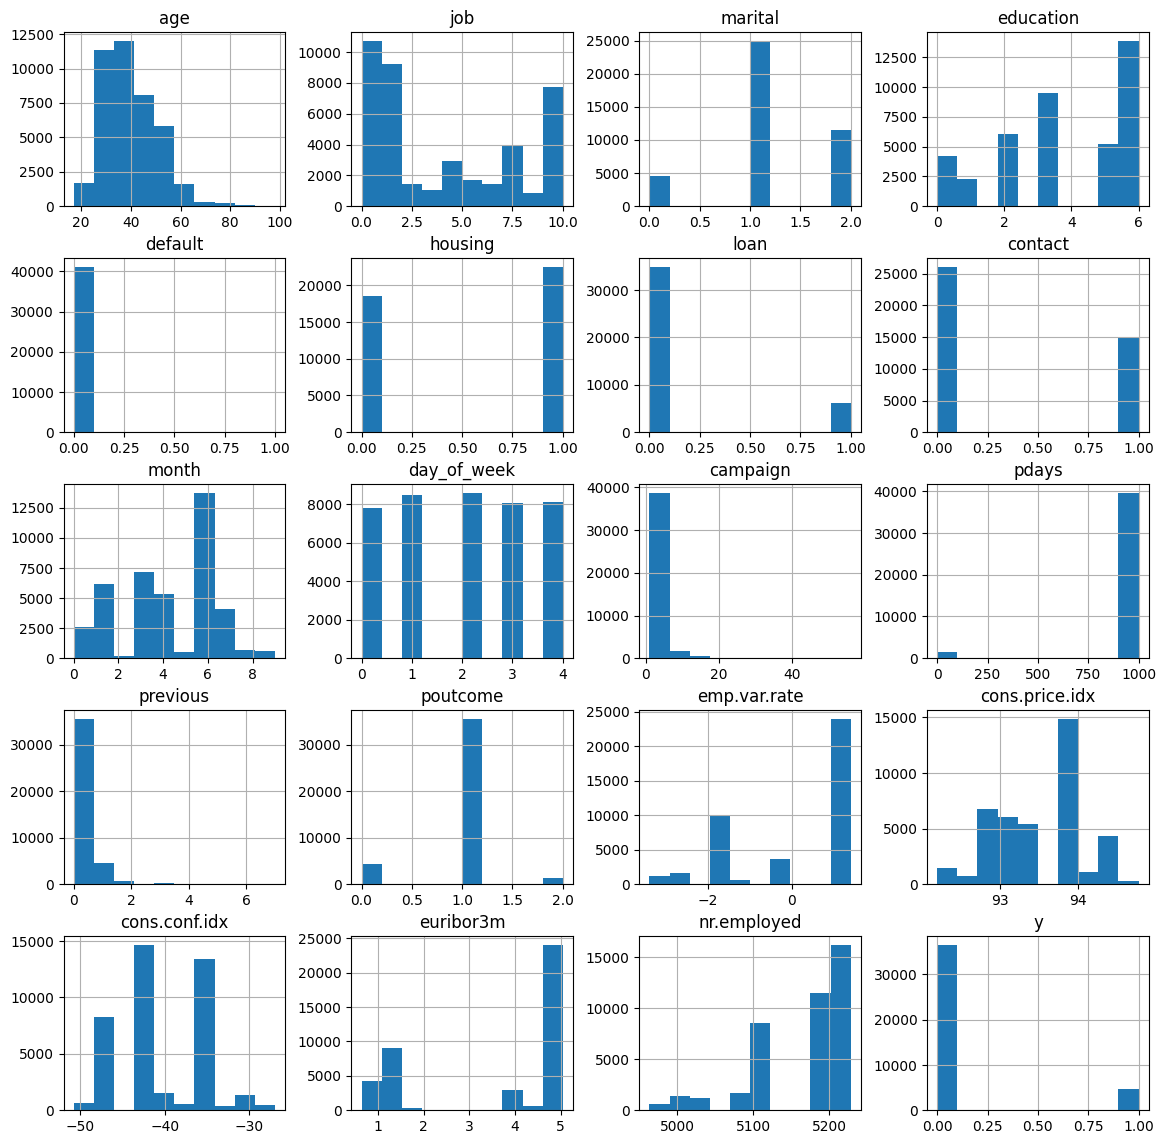

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])
df['day_of_week']=encoder.fit_transform(df['day_of_week'])
df['poutcome']=encoder.fit_transform(df['poutcome'])
df['y']=encoder.fit_transform(df['y'])
pd.DataFrame.hist(df,figsize=[14,14])
df

### Step3: Automatic Feature Selection

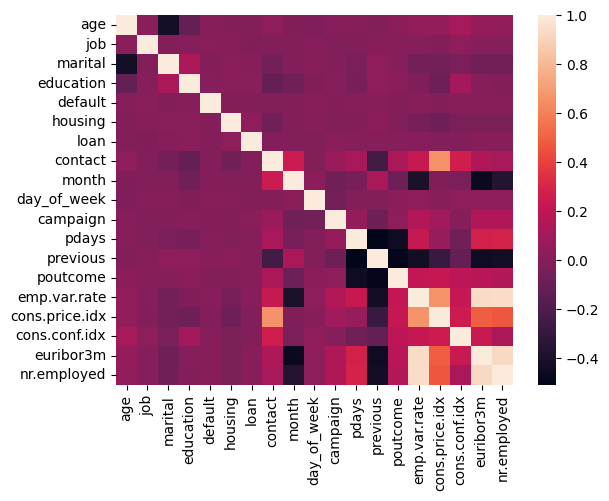

In [6]:
Y=df['y'].values
X=df.drop('y',axis=1) 
corr = X.corr(method = 'spearman')
sns.heatmap(corr, annot =False)
plt.show()

In [7]:
from featurewiz import featurewiz
features, df = featurewiz(df, 'y',corr_limit=0.8)

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.8
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (41176, 20)
    S

Selected features:  ['euribor3m', 'poutcome', 'cons.price.idx', 'month', 'pdays', 'contact', 'cons.conf.idx', 'day_of_week', 'education']


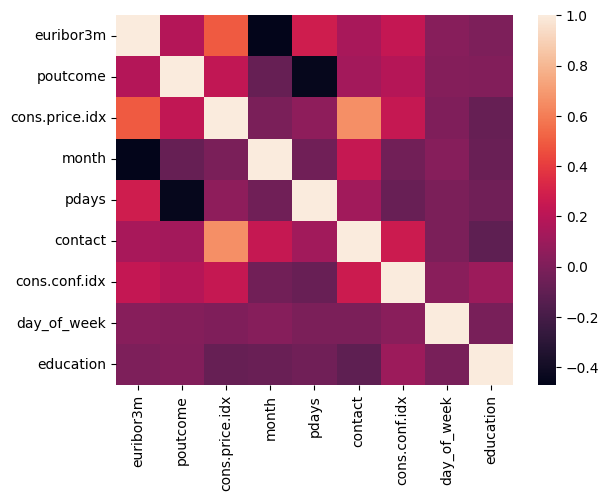

In [8]:
print('Selected features: ',features)
Y=df['y'].values
X=df.drop('y',axis=1) 
corr = X.corr(method = 'spearman')
sns.heatmap(corr, annot = False)
plt.show()

### Step4: Balancing data

,euribor3m,poutcome,cons.price.idx,month,pdays,contact,cons.conf.idx,day_of_week,education,y
0,4.857000,1,93.994,6,999,1,-36.4,1,0,0
1,4.857000,1,93.994,6,999,1,-36.4,1,3,0
2,4.857000,1,93.994,6,999,1,-36.4,1,3,0
3,4.857000,1,93.994,6,999,1,-36.4,1,1,0
4,4.857000,1,93.994,6,999,1,-36.4,1,3,0
...,...,...,...,...,...,...,...,...,...,...
48708,4.857243,1,93.994,6,999,1,-36.4,0,5,1
48709,0.649469,2,93.369,5,10,0,-34.8,3,6,1
48710,4.856616,1,93.994,6,999,1,-36.4,0,6,1
48711,0.739748,0,92.431,8,999,0,-26.9,4,6,1


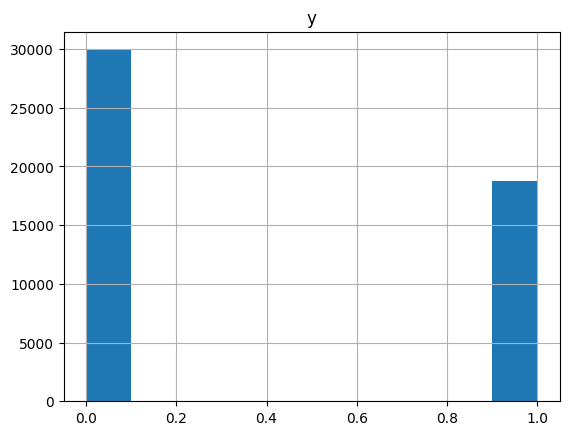

In [9]:
from imblearn.combine import SMOTEENN
smoteenn=SMOTEENN(random_state=42)
X_B,Y_B=smoteenn.fit_resample(X, Y)
Dataset=X_B
Dataset['y'] = Y_B
pd.DataFrame.hist(Dataset[['y']])
Dataset

### Step5: Standardized numerical value

In [10]:
std= StandardScaler()
#['euribor3m', 'duration', 'month', 'cons.conf.idx', 'pdays', 'cons.price.idx', 'poutcome', 'contact', 'education']
X=std.fit_transform(Dataset[['pdays','cons.price.idx','euribor3m','cons.conf.idx']])
Dataset['pdays'] = X[:,0]
Dataset['cons.price.idx'] = X[:,1]
Dataset['euribor3m'] = X[:,2]
Dataset['cons.conf.idx'] = X[:,3]
#df['nr.employed'] = X[:,9]
#df['age'] = X[:,0]
#df['campaign'] = X[:,2]
#df['previous'] = X[:,4]
#df['emp.var.rate'] = X[:,5]

### Step6: Dataset Split (Train Set, Train set without label, Test Set)

In [11]:
y=Dataset['y'].values
x=Dataset.drop('y',axis=1) 
x_data,x_test,y_data,y_test = train_test_split(x,y, train_size=0.5, random_state=42)
A=x_data
A['y']=y_data
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.5, random_state=42)
x_test=x_test.reset_index(drop=True)

# Part2: Supervised learning

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
def Analyze(Y_pred,Y_test,classifier):
    ACC=accuracy_score(Y_test, Y_pred)
    AUC = roc_auc_score(Y_test, Y_pred)
    print('AUC: {:.4f}'.format(AUC))
    print('Accuracy Score: {:.4f}'.format(ACC))
    print(classification_report(Y_test, Y_pred))
    mat = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=mat)
    disp.plot()
    plt.show()
    '''sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    ROC(Y_pred,Y_test,classifier)'''

'''def ROC(model, Y_pred,Y_test,classifier):
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.title('ROC curve for '+classifier)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()'''
def KNN_ROC(x_train,x_test,y_train,y_test,fig):
    knn=KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x_train, y_train)
    plot_roc_curve(estimator=knn,X=x_test,y=y_test,ax = fig.ax_)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')

def KNN(x_train,x_test,y_train,y_test,n=5):
    knn=KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    classifier='KNN'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=knn,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def LRC(x_train,x_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    classifier='Logistic Regression Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=lr,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def NB(x_train,x_test,y_train,y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train )  
    y_pred = nb.predict(x_test)
    classifier='GaussianNB Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=nb,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def SVM(x_train,x_test,y_train,y_test):
    svc = SVC(probability=True, gamma="auto")
    svc.fit( x_train, y_train )  
    y_pred = svc.predict(x_test)
    classifier='SVM'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=svc,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def DecisionTree(x_train,x_test,y_train,y_test):
    parameters = {'splitter':('best','random'),
                'criterion':("gini","entropy"),
                "max_depth":[*range(1, 20)]}
    # Change parameters
    DT = DecisionTreeClassifier() 
    model=GridSearchCV(DT,param_grid=parameters,cv=5,scoring='f1') 
    model.fit(x_train, y_train )
    y_pred = model.best_estimator_.predict(x_test)
    classifier='Decision Tree Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=model.best_estimator_,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def RandomForest(x_train,x_test,y_train,y_test):
    RF = RandomForestClassifier()
    parameters = {'criterion':("gini","entropy"),
                "max_depth":[*range(1, 20)],
                "n_estimators":[5,10,20,40]}
    model=GridSearchCV(RF,param_grid=parameters,cv=5,scoring='f1')  
    model.fit(x_train, y_train)  
    y_pred = model.best_estimator_.predict(x_test)
    classifier='Random Forest Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=model.best_estimator_,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def Gradient_Boosting(x_train,x_test,y_train,y_test):
    gb = GradientBoostingClassifier()
    parameters = {'max_depth':[*range(1, 10)]}
    model=GridSearchCV(gb,param_grid=parameters,cv=5,scoring='f1')  
    model.fit(x_train, y_train)  
    y_pred = model.best_estimator_.predict(x_test)
    classifier='Gradient Boost Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=model.best_estimator_,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test

def LDA(x_train,x_test,y_train,y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train )  
    y_pred = lda.predict(x_test )
    classifier='Linear Discriminant Analysis Classification'
    Analyze(y_pred,y_test,classifier)
    fig=plot_roc_curve(estimator=lda,X=x_test,y=y_test)
    KNN_ROC(x_train,x_test,y_train,y_test,fig)
    return y_pred,y_test


### KNN Classifier

AUC: 0.8989
Accuracy Score: 0.9104
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14917
           1       0.92      0.85      0.88      9440

    accuracy                           0.91     24357
   macro avg       0.91      0.90      0.90     24357
weighted avg       0.91      0.91      0.91     24357



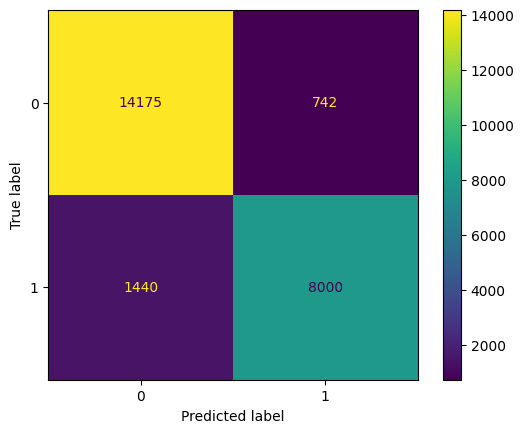

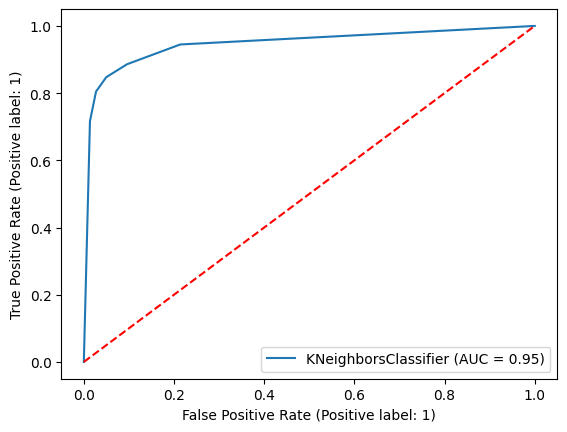

In [14]:
y_pred_KNN,y_test_KNN=KNN(x_train1,x_test,y_train1,y_test)

### Logistic Regression Classification

AUC: 0.8638
Accuracy Score: 0.8888
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     14917
           1       0.95      0.75      0.84      9440

    accuracy                           0.89     24357
   macro avg       0.91      0.86      0.88     24357
weighted avg       0.90      0.89      0.89     24357



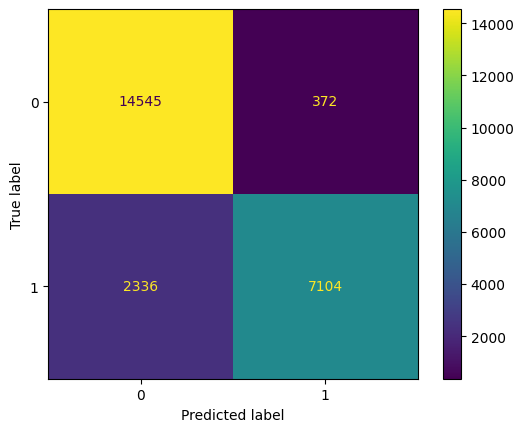

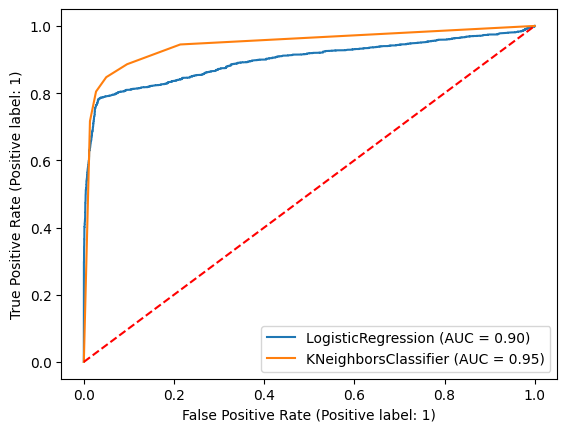

In [15]:
y_pred_LRC,y_test_LRC=LRC(x_train1,x_test,y_train1,y_test)

### GaussianNB Classification

AUC: 0.7871
Accuracy Score: 0.8173
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14917
           1       0.84      0.65      0.73      9440

    accuracy                           0.82     24357
   macro avg       0.82      0.79      0.80     24357
weighted avg       0.82      0.82      0.81     24357



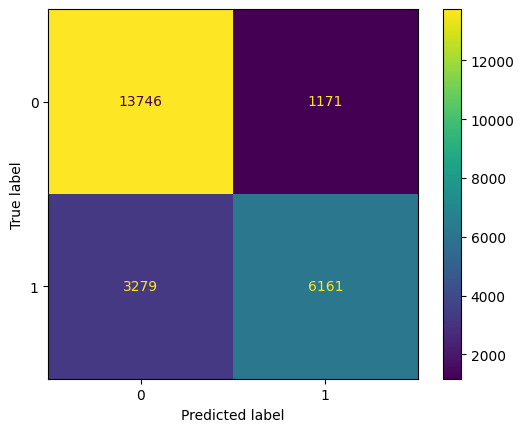

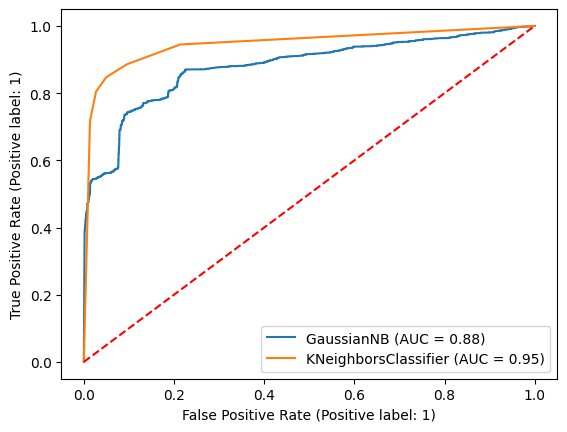

In [16]:
y_pred_NB,y_test_NB=NB(x_train1,x_test,y_train1,y_test)

### SVM Classification

AUC: 0.8915
Accuracy Score: 0.9080
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14917
           1       0.94      0.82      0.87      9440

    accuracy                           0.91     24357
   macro avg       0.92      0.89      0.90     24357
weighted avg       0.91      0.91      0.91     24357



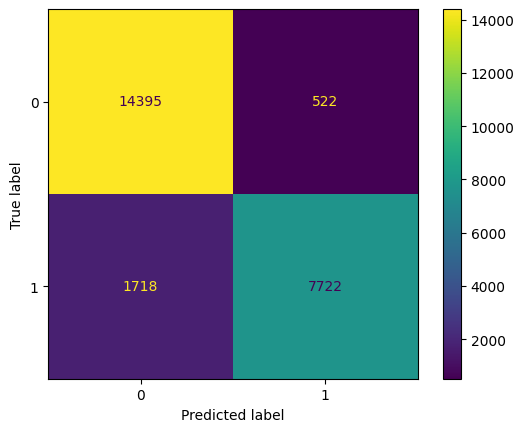

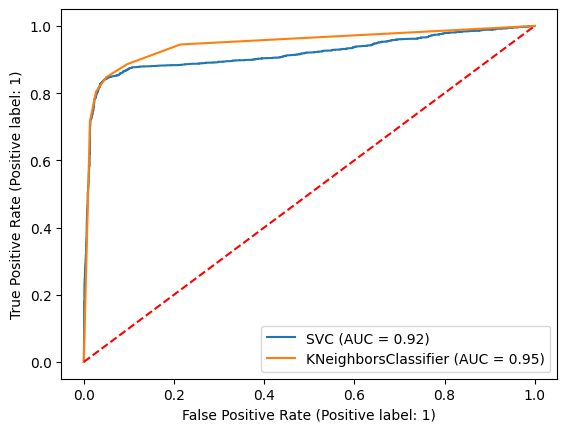

In [17]:
y_pred_SVM,y_test_SVM=SVM(x_train1,x_test,y_train1,y_test)

### Decision Tree Classification

AUC: 0.9387
Accuracy Score: 0.9472
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14917
           1       0.96      0.90      0.93      9440

    accuracy                           0.95     24357
   macro avg       0.95      0.94      0.94     24357
weighted avg       0.95      0.95      0.95     24357



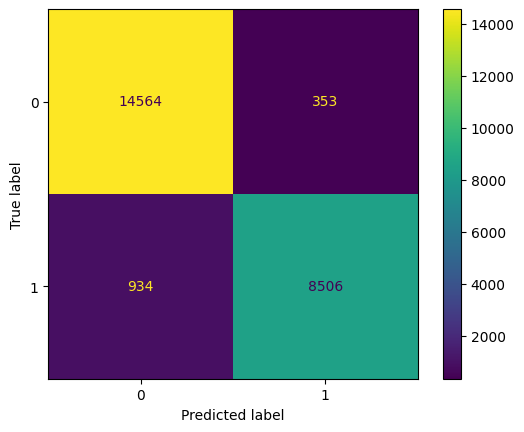

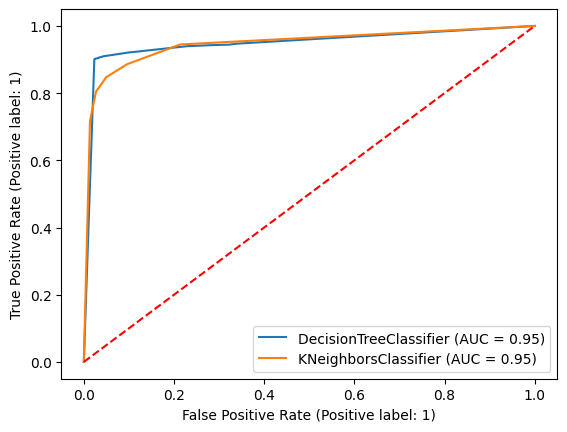

In [18]:
y_pred_DT,y_test_DT=DecisionTree(x_train1,x_test,y_train1,y_test)

### Random Forest Classification

AUC: 0.9350
Accuracy Score: 0.9433
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14917
           1       0.95      0.90      0.92      9440

    accuracy                           0.94     24357
   macro avg       0.95      0.94      0.94     24357
weighted avg       0.94      0.94      0.94     24357



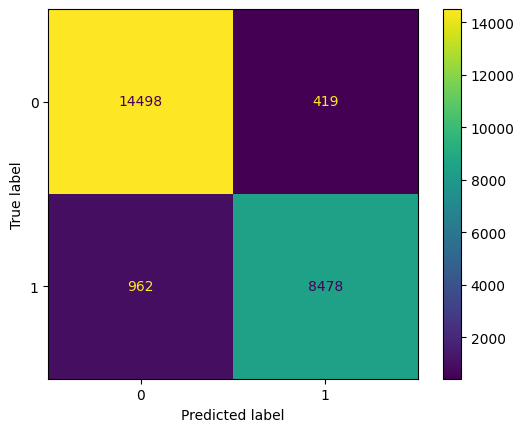

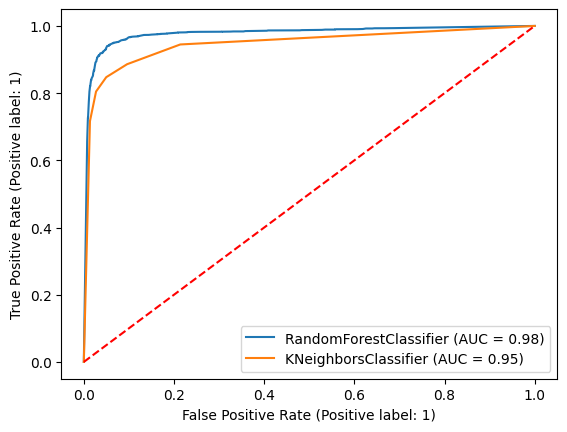

In [19]:
y_pred_DF,y_test_RF=RandomForest(x_train1,x_test,y_train1,y_test)

### Gradient Boost  Classification

AUC: 0.9506
Accuracy Score: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14917
           1       0.96      0.93      0.94      9440

    accuracy                           0.96     24357
   macro avg       0.96      0.95      0.95     24357
weighted avg       0.96      0.96      0.96     24357



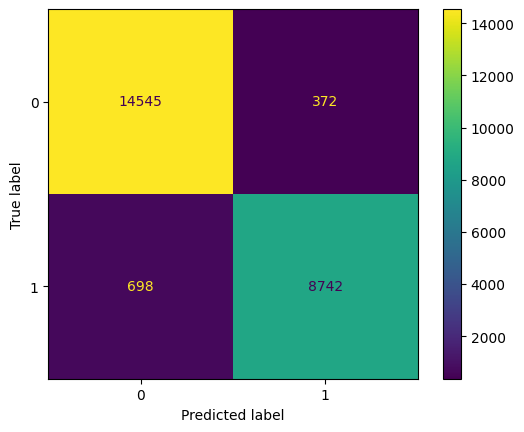

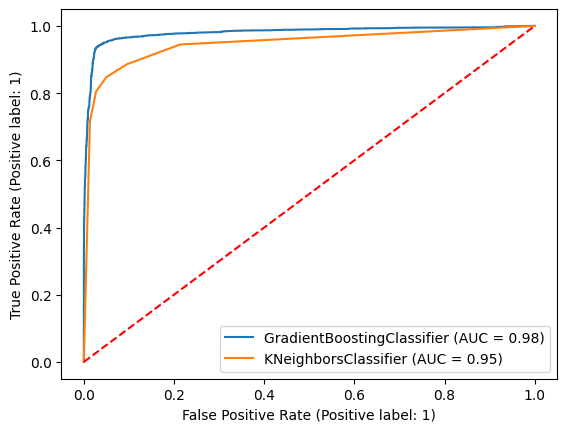

In [20]:
y_pred_GB,y_test_GB=Gradient_Boosting(x_train1,x_test,y_train1,y_test)

### Linear Discriminant Analysis Classification

AUC: 0.8636
Accuracy Score: 0.8887
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     14917
           1       0.95      0.75      0.84      9440

    accuracy                           0.89     24357
   macro avg       0.91      0.86      0.88     24357
weighted avg       0.90      0.89      0.89     24357



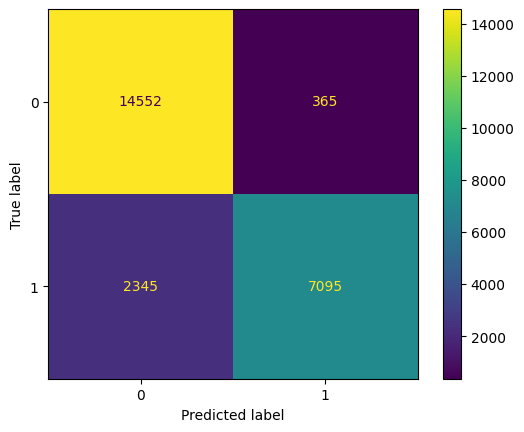

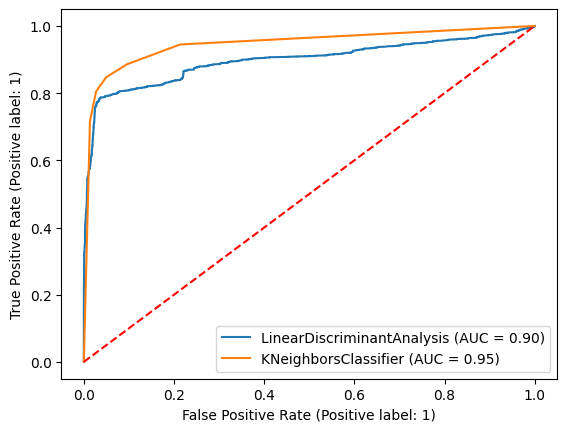

In [21]:
y_pred_LDA,y_test_LDA=LDA(x_train1,x_test,y_train1,y_test)

# Part3: Semi-Supervised learning

## Self Training Classifier

In [14]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [15]:
def data_process(x_train1,x_train2,y_train1):
    dataset=x_train1
    dataset['y']=y_train1
    dataset2=x_train2
    dataset2['y']=-1
    dataset=dataset.append(dataset2, ignore_index=True)
    dataset = dataset[np.isfinite(dataset).all(1)]
    dataset.reset_index()
    return dataset

def SS_KNN(x_train,x_test,y_train,y_test,n=5):
    knn=KNeighborsClassifier(n_neighbors = n)
    SS_model = SelfTrainingClassifier(knn)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS KNN'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_LRC(x_train,x_test,y_train,y_test):
    lr = LogisticRegression()
    SS_model = SelfTrainingClassifier(lr)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS Logistic Regression Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_NB(x_train,x_test,y_train,y_test):
    nb = GaussianNB()
    SS_model = SelfTrainingClassifier(nb)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS GaussianNB Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_SVM(x_train,x_test,y_train,y_test,x,y):
    svc = SVC(probability=True, gamma="auto")
    '''svc.fit(x,y)
    svc.predict_proba(x_test)'''
    SS_model = SelfTrainingClassifier(svc)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS SVM'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_DecisionTree(x_train,x_test,y_train,y_test,x,y):
    parameters = {'splitter':('best','random'),
                'criterion':("gini","entropy"),
                "max_depth":[*range(1, 20)]}
    DT = DecisionTreeClassifier() 
    model=GridSearchCV(DT,param_grid=parameters,cv=5,scoring='f1')
    model.fit(x, y) 
    SS_model = SelfTrainingClassifier(model.best_estimator_)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS Decision Tree Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    '''SS_model = SelfTrainingClassifier(DT)
    model=GridSearchCV(SS_model,param_grid=parameters,cv=10,scoring='f1') 
    model.fit(x_train, y_train)
    y_pred = model.best_estimator_.predict(x_test)
    classifier='Self Training SS Decision Tree Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=model.best_estimator_,X=x_test,y=y_test)'''
    return y_pred,y_test

def SS_RandomForest(x_train,x_test,y_train,y_test,x,y):
    RF = RandomForestClassifier()
    parameters = {'criterion':("gini","entropy"),
                "max_depth":[*range(1, 20)],
                "n_estimators":[5,10,20,40]}
    model=GridSearchCV(RF,param_grid=parameters,cv=5,scoring='f1')
    model.fit(x, y) 
    SS_model = SelfTrainingClassifier(model.best_estimator_)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS Random Forest Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_Gradient_Boosting(x_train,x_test,y_train,y_test,x,y):
    gb = GradientBoostingClassifier()
    parameters = {'max_depth':[*range(1, 10)]}
    model=GridSearchCV(gb,param_grid=parameters,cv=5,scoring='f1')
    model.fit(x, y) 
    SS_model = SelfTrainingClassifier(model.best_estimator_)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS Gradient Boost Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

def SS_LDA(x_train,x_test,y_train,y_test):
    lda = LinearDiscriminantAnalysis()
    SS_model = SelfTrainingClassifier(lda)
    SS_model.fit(x_train, y_train)
    y_pred = SS_model.predict(x_test)
    classifier='Self Training SS Linear Discriminant Analysis Classification'
    Analyze(y_pred,y_test,classifier)
    plot_roc_curve(estimator=SS_model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

D=data_process(x_train1,x_train2,y_train1)
y_train_SSL=D['y'].values
x_train_SSL=D.drop('y',axis=1) 

### Semi-Supervised Self Training KNN Classification

AUC: 0.8982
Accuracy Score: 0.9097
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14917
           1       0.91      0.85      0.88      9440

    accuracy                           0.91     24357
   macro avg       0.91      0.90      0.90     24357
weighted avg       0.91      0.91      0.91     24357



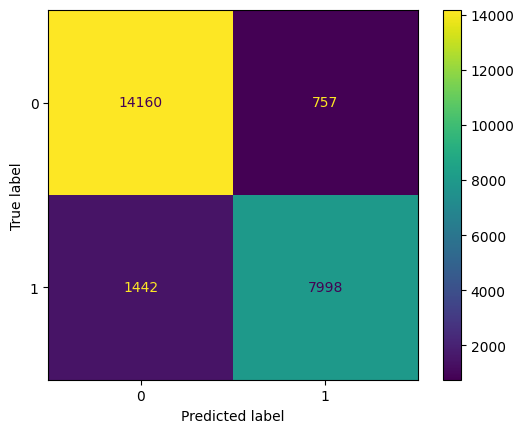

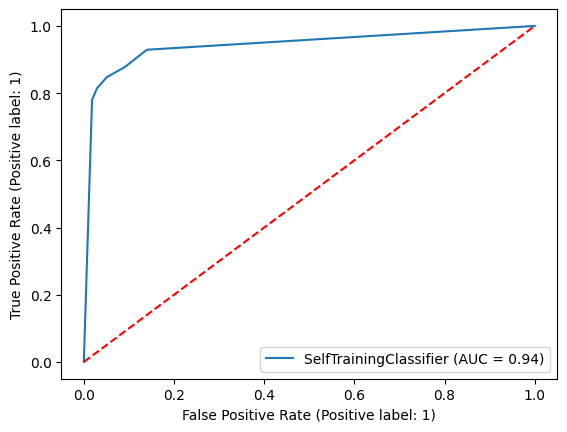

In [24]:
y_pred_SS_KNN,y_test_SS_KNN=SS_KNN(x_train_SSL,x_test,y_train_SSL,y_test)

### Semi-Supervised Self Training Logistic Regression Classification

AUC: 0.8638
Accuracy Score: 0.8888
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     14917
           1       0.95      0.75      0.84      9440

    accuracy                           0.89     24357
   macro avg       0.91      0.86      0.88     24357
weighted avg       0.90      0.89      0.89     24357



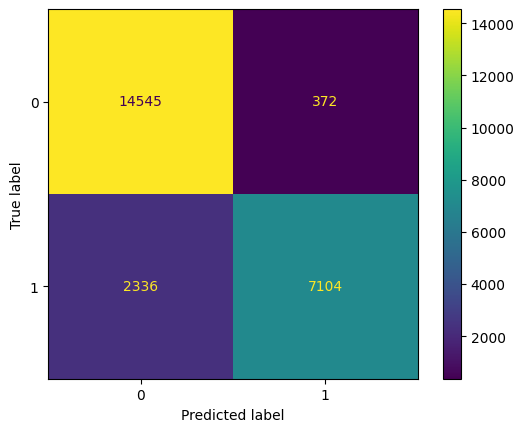

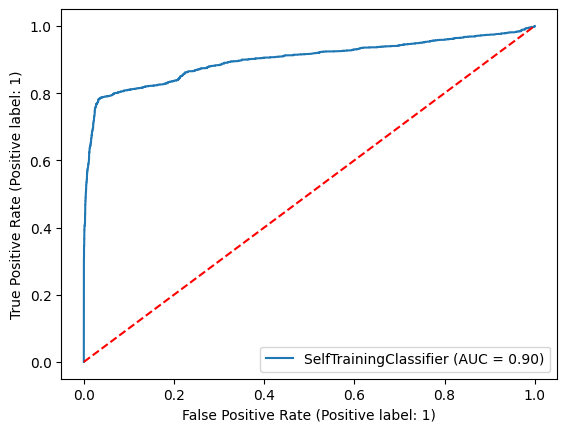

In [25]:
y_pred_SS_DT,y_test_SS_DT=SS_LRC(x_train_SSL,x_test,y_train_SSL,y_test)

### Semi-Supervised Self Training GaussianNB Classification

AUC: 0.7930
Accuracy Score: 0.8219
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14917
           1       0.84      0.66      0.74      9440

    accuracy                           0.82     24357
   macro avg       0.83      0.79      0.80     24357
weighted avg       0.82      0.82      0.82     24357



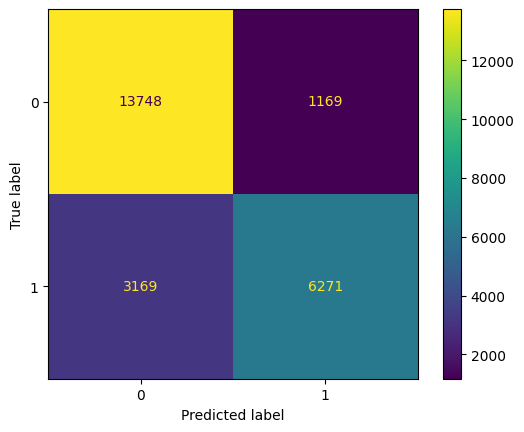

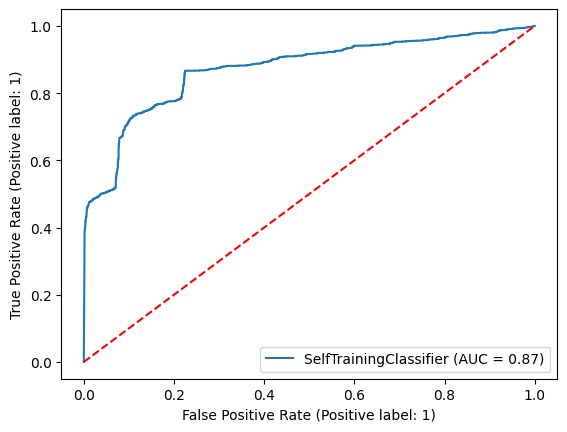

In [26]:
y_pred_SS_NB,y_test_SS_NB=SS_NB(x_train_SSL,x_test,y_train_SSL,y_test)

### Semi-Supervised Self Training SVM Classification

AUC: 0.8930
Accuracy Score: 0.9093
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14917
           1       0.94      0.82      0.88      9440

    accuracy                           0.91     24357
   macro avg       0.92      0.89      0.90     24357
weighted avg       0.91      0.91      0.91     24357



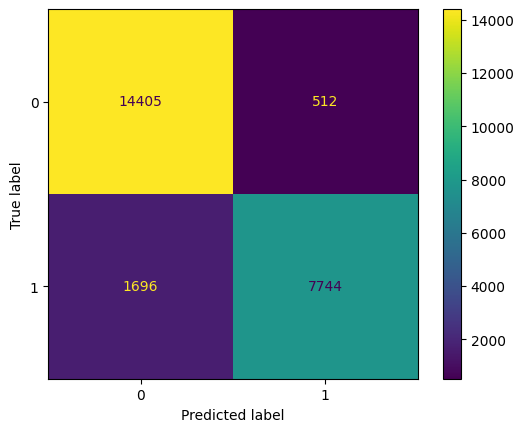

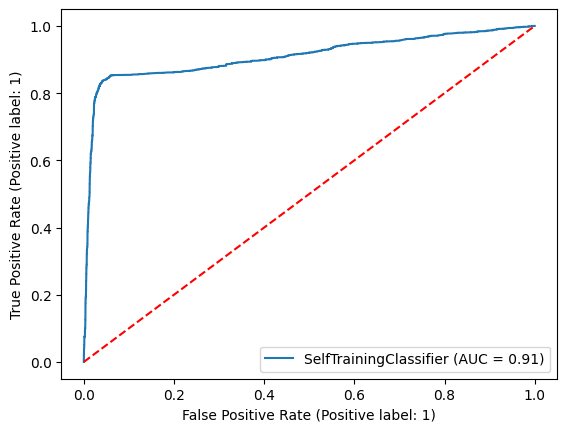

In [27]:
y_pred_SS_SVM,y_test_SS_SVM=SS_SVM(x_train_SSL,x_test,y_train_SSL,y_test,x_train1,y_train1)

### Semi-Supervised Self Training Decision Tree Classification

AUC: 0.8366
Accuracy Score: 0.8624
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     14917
           1       0.90      0.72      0.80      9440

    accuracy                           0.86     24357
   macro avg       0.87      0.84      0.85     24357
weighted avg       0.87      0.86      0.86     24357



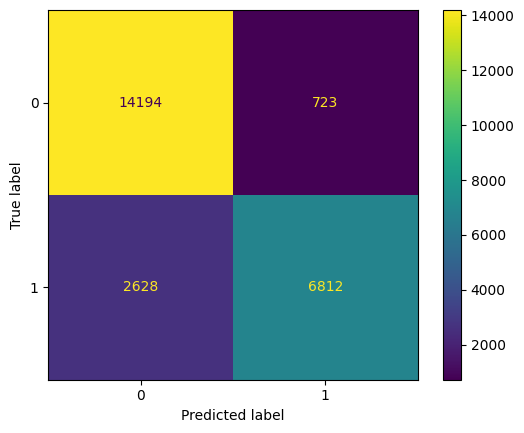

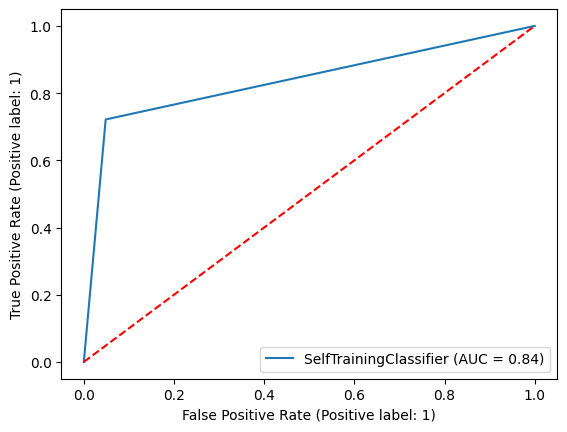

In [28]:
y_pred_SS_DT,y_test_SS_DT=SS_DecisionTree(x_train_SSL,x_test,y_train_SSL,y_test,x_train1,y_train1)

### Semi-Supervised Self Training Random Forest Classification

AUC: 0.8528
Accuracy Score: 0.8748
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14917
           1       0.91      0.75      0.82      9440

    accuracy                           0.87     24357
   macro avg       0.88      0.85      0.86     24357
weighted avg       0.88      0.87      0.87     24357



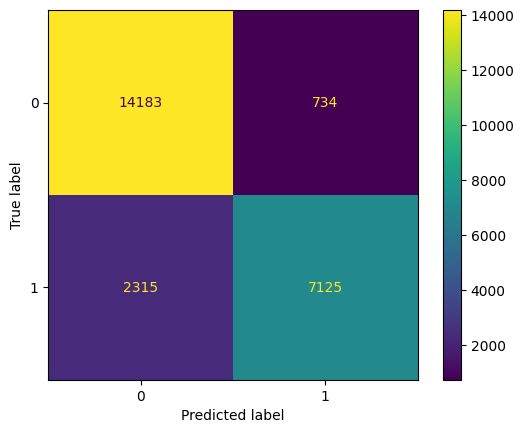

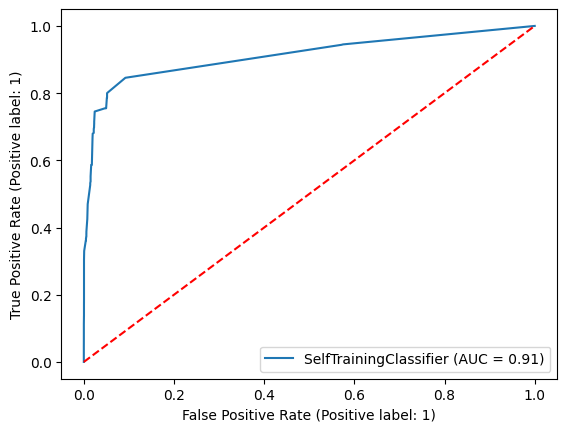

In [29]:
y_pred_SS_RF,y_test_SS_RF=SS_RandomForest(x_train_SSL,x_test,y_train_SSL,y_test,x_train1,y_train1)

### Semi-Supervised Self Training Gradient Boost Classification 

AUC: 0.8702
Accuracy Score: 0.8935
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     14917
           1       0.95      0.77      0.85      9440

    accuracy                           0.89     24357
   macro avg       0.91      0.87      0.88     24357
weighted avg       0.90      0.89      0.89     24357



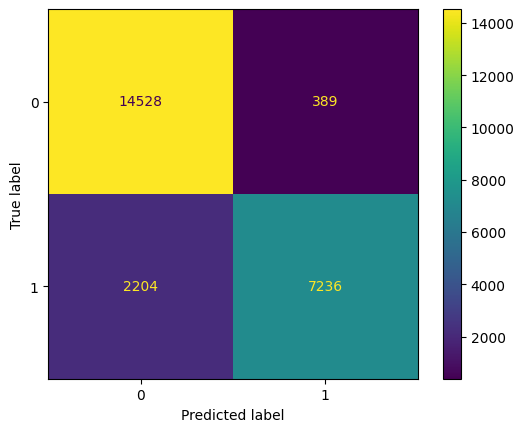

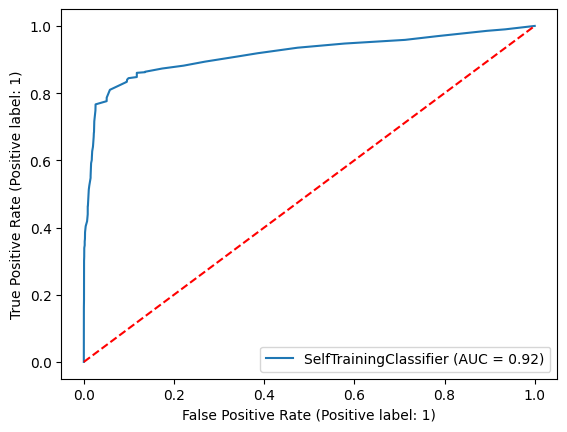

In [30]:
y_pred_SS_GB,y_test_SS_BG=SS_Gradient_Boosting(x_train_SSL,x_test,y_train_SSL,y_test,x_train1,y_train1)

### Semi-Supervised Self Training Linear Discriminant Analysis Classification 

AUC: 0.8503
Accuracy Score: 0.8786
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     14917
           1       0.95      0.72      0.82      9440

    accuracy                           0.88     24357
   macro avg       0.90      0.85      0.87     24357
weighted avg       0.89      0.88      0.87     24357



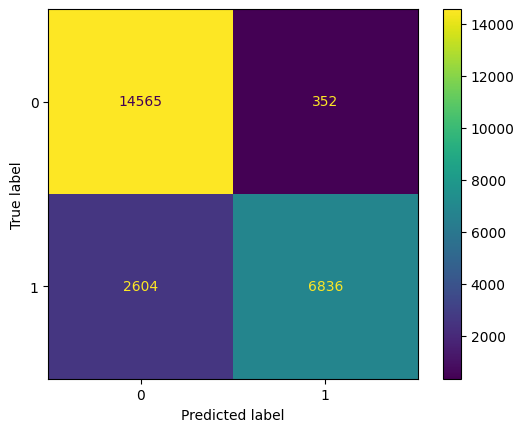

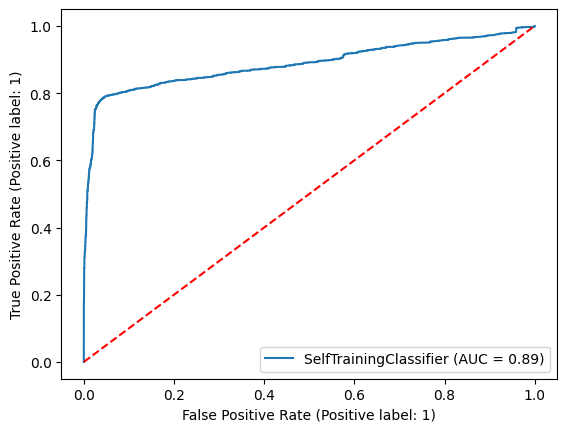

In [31]:
y_pred_SS_LDA,y_test_SS_LDA=SS_LDA(x_train_SSL,x_test,y_train_SSL,y_test)

## Label Propagation Classifier

### Semi-Supervised Label Propagation

In [16]:
from sklearn.semi_supervised import LabelPropagation

def SSLP(x_train,x_test,y_train,y_test):
    model = LabelPropagation()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    classifier='Semi-Supervised Label Propagation'
    Analyze(y_pred,y_test,classifier)
    x_test=x_test.drop([9169])
    y_test=np.delete(y_test, 9169, 0)
    plot_roc_curve(estimator=model,X=x_test,y=y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    return y_pred,y_test

AUC: 0.8971
Accuracy Score: 0.9109
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14917
           1       0.93      0.84      0.88      9440

    accuracy                           0.91     24357
   macro avg       0.91      0.90      0.90     24357
weighted avg       0.91      0.91      0.91     24357



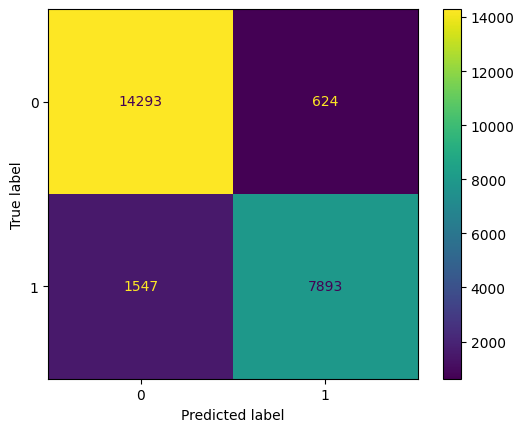

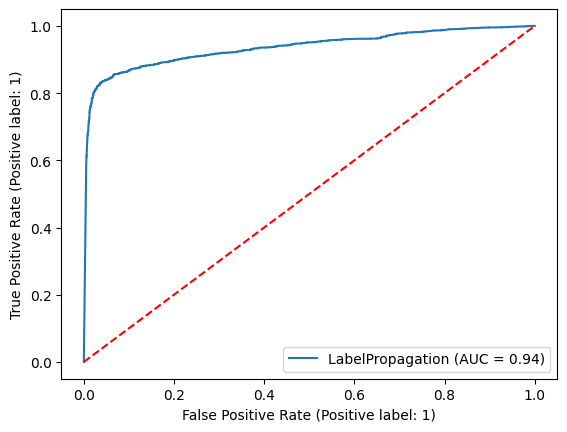

In [17]:
y_pred_SSLP,y_test_SSLP=SSLP(x_train_SSL,x_test,y_train_SSL,y_test)

# Part4: Test with different number of labeled data

In [18]:
def plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test):
    
    knn=KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x_train1,y_train1)  
    fig=plot_roc_curve(estimator=knn,X=x_test,y=y_test,name='KNN')
    
    svc = SVC(probability=True, gamma="auto")
    svc.fit(x_train1,y_train1)  
    fig=plot_roc_curve(estimator=svc,X=x_test,y=y_test,ax = fig.ax_,name='SVM')

    RF = RandomForestClassifier()
    parameters = {'criterion':("gini","entropy"),
                "max_depth":[*range(1, 20)],
                "n_estimators":[5,10,20,40]}
    model=GridSearchCV(RF,param_grid=parameters,cv=5,scoring='f1')
    model.fit(x_train1,y_train1) 
    fig=plot_roc_curve(estimator=model,X=x_test,y=y_test,ax = fig.ax_,name='RF')


    D=data_process(x_train1,x_train2,y_train1)
    y_train_SSL=D['y'].values
    x_train_SSL=D.drop('y',axis=1)

    SS_model = SelfTrainingClassifier(knn)
    SS_model.fit(x_train_SSL, y_train_SSL)
    fig=plot_roc_curve(estimator=SS_model,X=x_test,y=y_test,ax = fig.ax_,name='SSL KNN')

    SS_model = SelfTrainingClassifier(svc)
    SS_model.fit(x_train_SSL, y_train_SSL)
    fig=plot_roc_curve(estimator=SS_model,X=x_test,y=y_test,ax = fig.ax_,name='SSL SVM')

    SS_model = SelfTrainingClassifier(model.best_estimator_)
    SS_model.fit(x_train_SSL, y_train_SSL)
    fig=plot_roc_curve(estimator=SS_model,X=x_test,y=y_test,ax = fig.ax_,name='SSL RF')

    model = LabelPropagation()
    model.fit(x_train_SSL, y_train_SSL)
    A=x_test.drop([9169])
    B=np.delete(y_test, 9169, 0)
    plot_roc_curve(estimator=model,X=A,y=B,ax = fig.ax_)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    fig.figure_.suptitle("ROC curve comparison at "+str(x_train1.shape[0])+" labeled data point")
    
    plt.show()

## 7 labeled data

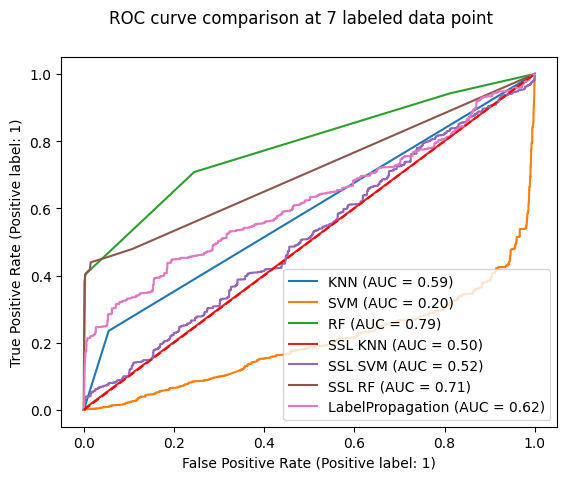

In [20]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.0007, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)


## 15 labeled data

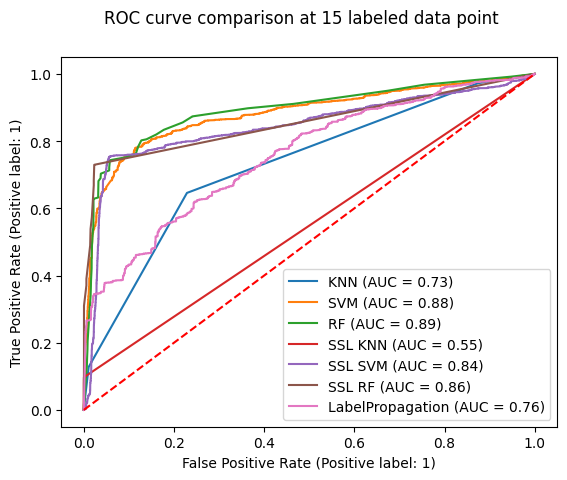

In [21]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.0015, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)

## 30 labeled data

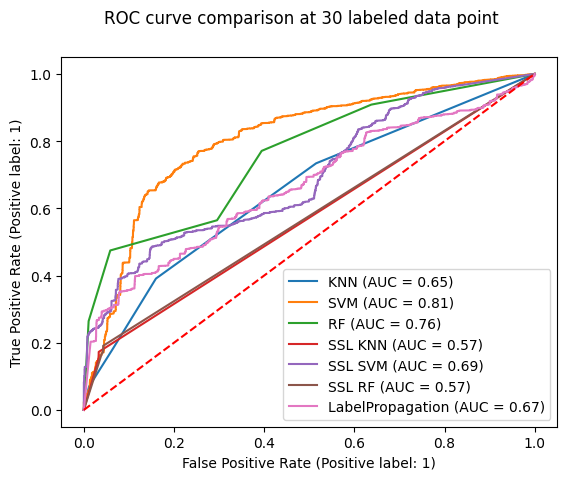

In [22]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.003, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)

## 100 labeled data

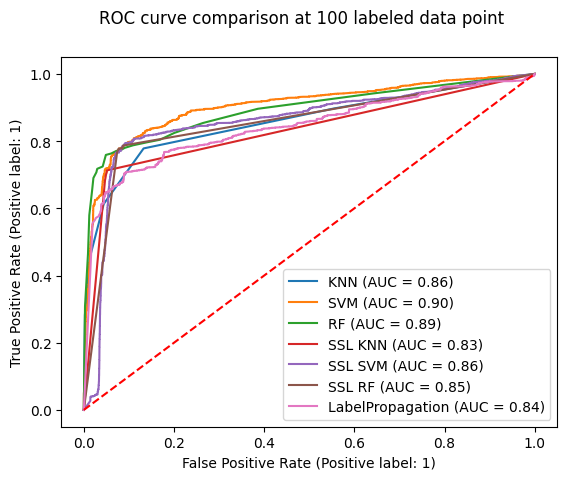

In [23]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.01, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)

## 500 labeled data

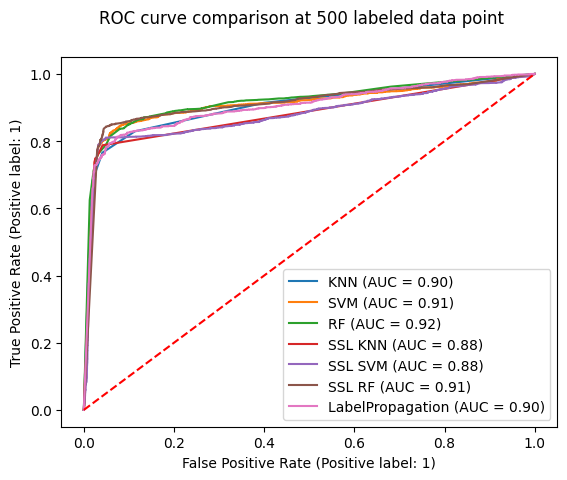

In [24]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.05, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)

## 2000 labeled data

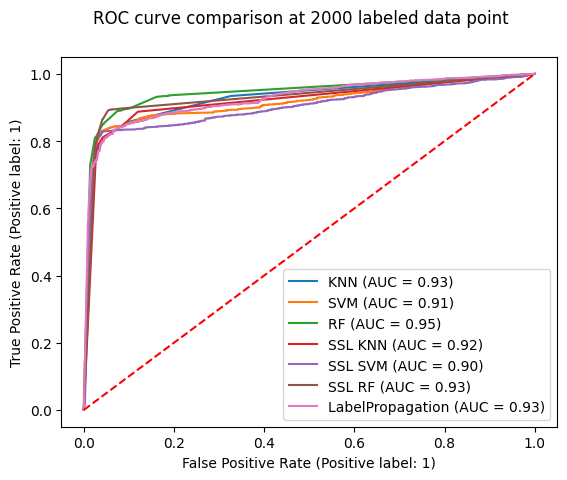

In [25]:
New_data=A.sample(n = 10000)
y_data=New_data['y'].values
x_data=New_data.drop('y',axis=1) 
x_train1,x_train2,y_train1,y_train2 = train_test_split(x_data,y_data, train_size=0.2, random_state=42)
x_test=x_test.reset_index(drop=True)
plt_roc(x_train1,x_train2,y_train1,y_train2,x_test,y_test)